# Visualizations
Various visualizations to be included in the presentation.

In [1]:
import os
import json
import pkg_resources

import numpy as np
from scipy.interpolate import splev,splrep
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib import ticker
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import sunpy
from sunpy.map import Map
from sunpy.net import vso
import astropy.units as u
import astropy.constants as const

import synthesizAR
from synthesizAR.atomic import EmissionModel
from synthesizAR.util import EISCube
from synthesizAR.instruments import InstrumentSDOAIA,InstrumentHinodeEIS

sns.set_context('notebook',font_scale=1)

%matplotlib inline

/opt/anaconda3/envs/synthesizar/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


 using cli
 using CLI for selections
 reading chiantirc file


In [2]:
ar_root = '/data/datadrive2/ar_viz/seminar_poc/'

## Example Observation

Grab a sample AR observation and plot it.

In [ ]:
client = vso.VSOClient()
result_aia = client.query(
     vso.attrs.Time((2011, 4, 15, 0, 0, 0), (2011, 4, 15, 2, 0, 0)),
     vso.attrs.Instrument('AIA'),
     vso.attrs.Sample(5000 * u.s)
)
data_aia = client.get(result_aia,methods=('URL-FILE_Rice','URL-FILE')).wait()

In [ ]:
sample_observation = Map(data_aia[0])

In [ ]:
xrange = u.Quantity([-50,450] * u.arcsec)
yrange = u.Quantity([50,500] * u.arcsec)
sample_observation_submap = sample_observation.submap(xrange,yrange)

In [ ]:
fig = plt.figure(figsize=(10,4))
ax_full = fig.add_subplot(121,projection=sample_observation)
ax_zoom = fig.add_subplot(122,projection=sample_observation_submap)
sample_observation.plot(axes=ax_full,title=False,
                        #norm=matplotlib.colors.SymLogNorm(1e-2,vmin=0.1,vmax=10000),
                        vmin=100,vmax=10000
                       )
sample_observation_submap.plot(axes=ax_zoom,title=False,
                               #norm=matplotlib.colors.SymLogNorm(1e-2,vmin=0.1,vmax=10000),
                               vmin=100,vmax=10000
                              )
sample_observation.draw_rectangle(u.Quantity([xrange[0],yrange[0]]),
                                  xrange[1]-xrange[0],
                                  yrange[1]-yrange[0],
                                  axes=ax_full,color=sns.color_palette('deep')[0],lw=2)
plt.savefig('../figures/sample_171_with_zoom.pdf')

## Example Magnetogram

In [3]:
field = synthesizAR.Skeleton.restore(os.path.join(ar_root,'checkpoint'))

No HMI fits file supplied. A new HMI map object will not be created.
yt : [INFO     ] 2017-02-27 11:19:49,220 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-02-27 11:19:49,221 Parameters: domain_dimensions         = [96 96 46]
yt : [INFO     ] 2017-02-27 11:19:49,222 Parameters: domain_left_edge          = [ -2.89511786e+10   2.37893407e+10   4.40182588e+08]
yt : [INFO     ] 2017-02-27 11:19:49,223 Parameters: domain_right_edge         = [ -1.06601257e+10   3.93100982e+10   1.05643821e+10]
yt : [INFO     ] 2017-02-27 11:19:49,224 Parameters: cosmological_simulation   = 0.0


In [10]:
emiss_model = EmissionModel.restore(os.path.join(ar_root,'checkpoint_emiss_model'))

Fe VI psplups file not found
Fe VIII psplups file not found
Fe XVI psplups file not found
Fe XVII psplups file not found
Fe XXIV psplups file not found
Fe XXV psplups file not found


In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111,projection=field.hmi_map)
im = field.hmi_map.plot(axes=ax,title=False)
plt.savefig('../figures/example_magnetogram.pdf')

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
for loop in field.loops:
    ax.plot3D(loop.coordinates[:,0],loop.coordinates[:,1],loop.coordinates[:,2],
              alpha=0.5,color=sns.color_palette('deep')[0])
ax.view_init(elev=45)
ax.set_xlabel(r'$x$ $(${}$)$'.format(loop.coordinates.unit.to_string(format='latex')),fontsize=14)
ax.set_ylabel(r'$y$ $(${}$)$'.format(loop.coordinates.unit.to_string(format='latex')),fontsize=14)
ax.set_zlabel(r'$z$ $(${}$)$'.format(loop.coordinates.unit.to_string(format='latex')),fontsize=14)
ax.grid(False)
ax.w_xaxis.set_pane_color([1,1,1])
ax.w_yaxis.set_pane_color([1,1,1])
ax.w_zaxis.set_pane_color([1,1,1])
plt.savefig('../figures/example_extrapolated_lines.pdf',bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
for loop in field.loops:
    ax.plot3D(loop.coordinates[:,0],loop.coordinates[:,1],loop.coordinates[:,2],
              alpha=0.5,color=sns.color_palette('deep')[0])
ax.view_init(elev=0,azim=-45)
ax.set_xlabel(r'$x$ $(${}$)$'.format(loop.coordinates.unit.to_string(format='latex')),fontsize=14)
ax.set_ylabel(r'$y$ $(${}$)$'.format(loop.coordinates.unit.to_string(format='latex')),fontsize=14)
ax.set_zlabel(r'$z$ $(${}$)$'.format(loop.coordinates.unit.to_string(format='latex')),fontsize=14)
ax.grid(False)
ax.w_xaxis.set_pane_color([1,1,1])
ax.w_yaxis.set_pane_color([1,1,1])
ax.w_zaxis.set_pane_color([1,1,1])
plt.savefig('../figures/example_extrapolated_lines_straight_on.pdf',bbox_inches='tight')

## Proof of Concept

In [ ]:
field.peek(figsize=(6,6),alpha=0.45,print_to_file='../figures/poc_magnetogram.pdf')

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
h = ax.hist([loop.full_length.value for loop in field.loops],
            bins=20,histtype='stepfilled',color=sns.color_palette('deep')[0],alpha=0.5)
ax.set_xscale('log')
ax.set_xlim([1e9,3e10])
ax.set_xlabel(r'$L$ $(${}$)$'.format(field.loops[0].full_length.unit.to_string(format='latex')),fontsize=14)
ax.set_ylabel(r'Number of Loops',fontsize=14)
plt.savefig('../figures/loop_distribution.pdf')

In [ ]:
fig,axes = plt.subplots(2,1,figsize=(8,5),sharex=True)
plt.subplots_adjust(hspace=0.0)
for loop in field.loops:
    axes[0].plot(loop.time,loop.temperature[:,0].to(u.MK),color=sns.color_palette('deep')[0],alpha=0.2)
    axes[1].plot(loop.time,loop.density[:,0]/1e8,color=sns.color_palette('deep')[2],alpha=0.2)
axes[0].set_ylim([0.5,18])
axes[1].set_ylim([1,180])
axes[0].yaxis.set_major_locator(ticker.MaxNLocator(nbins=5,prune='lower'))
axes[1].yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
axes[1].set_xlabel(r'$t$ $(${}$)$'.format(loop.time.unit.to_string(format='latex')))
axes[0].set_ylabel(r'$T$ $(${}$)$'.format(loop.temperature.to(u.MK).unit.to_string(format='latex')))
axes[1].set_ylabel(r'$n$ $(10^8\,${}$)$'.format(loop.density.unit.to_string(format='latex')))
plt.savefig('../figures/loop_profiles.pdf')

In [ ]:
fig,axes = plt.subplots(2,1,figsize=(8,5))
for i,transition in enumerate([emiss_model.resolved_wavelengths[0],emiss_model.resolved_wavelengths[5]]):
    for loop in field.loops:
        em,ion_name = loop.get_emission(transition.value,return_ion_name=True)
        axes[i].plot(loop.time,em[:,0],color=sns.color_palette('deep')[i])

In [4]:
aia = InstrumentSDOAIA([0,4990]*u.s,use_temperature_response_functions=False)

In [5]:
def plot_aia_frame(time):
    x_world_text = -380.0*u.arcsecond
    y_world_text = 510.0*u.arcsecond
    i_time = np.where(aia.observing_time==time)
    if len(i_time[0])==0:
        raise ValueError('{} is not a valid timestamp'.format(time))
    time_index = i_time[0][0]
    fig = plt.figure(figsize=(8,4.5))
    for j,chan in enumerate(aia.channels):
        aia_map = Map(os.path.join(ar_root,'SDO_AIA/{chan}/map_t{i:06d}.fits'.format(chan=chan['name'],i=time_index)))
        ax = fig.add_subplot(2,3,j+1,projection=aia_map)
        aia_map.plot(axes=ax,norm=matplotlib.colors.SymLogNorm(1e-8,vmin=1e-1,vmax=400),annotate=False)
        if j<3:
            ax.coords[0].set_ticklabel_visible(False)
            ax.coords[0].set_ticks_visible(False)
        else:
            ax.coords[0].set_axislabel(r'$x$ $(\mathrm{{{uni}}})$'.format(uni=aia_map.center.x.unit),
                                      fontsize=matplotlib.rcParams['axes.labelsize'])
            ax.coords[0].set_ticklabel(fontsize=matplotlib.rcParams['xtick.labelsize'])
        if j%3!=0:
            ax.coords[1].set_ticklabel_visible(False)
            ax.coords[1].set_ticks_visible(False)
        else:
            ax.coords[1].set_axislabel(r'$y$ $(\mathrm{{{uni}}})$'.format(uni=aia_map.center.y.unit),
                                       fontsize=matplotlib.rcParams['axes.labelsize'])
            ax.coords[1].set_ticklabel(fontsize=matplotlib.rcParams['ytick.labelsize'])
        x_pixel,y_pixel = aia_map.data_to_pixel(x_world_text,y_world_text)
        ax.text(x_pixel.value,y_pixel.value,r'${}$ $\mathrm{{\AA}}$'.format(chan['name']),
                fontsize=1.3*matplotlib.rcParams['ytick.labelsize'],
                color='w')
    x_pixel,y_pixel = aia_map.data_to_pixel(-230*u.arcsec,
                                            340*u.arcsec)
    fig.axes[2].text(x_pixel.value,y_pixel.value,
                     r'$t={}$ {}'.format(time.value,time.unit.to_string(format='latex')),
                 fontsize=matplotlib.rcParams['axes.labelsize'],color='w')
    plt.tight_layout(pad=0,h_pad=0)
    #plt.savefig(__dest__[1],bbox_inches='tight')


In [ ]:
plot_aia_frame(3000*u.s)
#plt.savefig('../figures/aia_frame.pdf',bbox_inches='tight')

In [7]:
for i,t in enumerate(aia.observing_time):
    plot_aia_frame(t)
    plt.savefig(os.path.join(ar_root,'figures','SDO_AIA','all_channels_{:06d}.pdf'.format(i)),
                bbox_inches='tight')
    plt.clf()

/opt/anaconda3/envs/synthesizar/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/opt/anaconda3/envs/synthesizar/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/opt/anaconda3/envs/synthesizar/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are

In [8]:
%%bash
convert -delay 5 -loop 0 /data/datadrive2/ar_viz/seminar_poc/figures/SDO_AIA/*.pdf ../figures/aia_movie.gif

## Testing Emiss Model

In [20]:
ion = emiss_model.ions[0]

In [21]:
w,e = ion['ion'].calculate_emissivity()

In [34]:
t0_index = np.where(w==ion['transitions'][1])[0][0]

In [36]:
np.all(np.reshape(e[t0_index,:],emiss_model.temperature_mesh.shape).value==ion['emissivity'][:,:,1].value)

True

In [37]:
for i,t in enumerate(ion['transitions']):
    t0_index = np.where(w==t)[0][0]
    print(np.all(np.reshape(e[t0_index,:],emiss_model.temperature_mesh.shape).value==ion['emissivity'][:,:,i].value))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


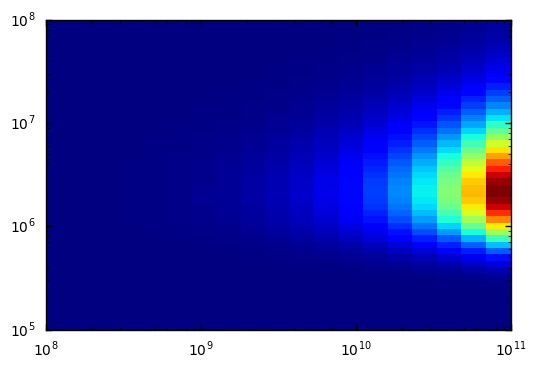

In [33]:
plt.pcolor(emiss_model.density_mesh.value,
           emiss_model.temperature_mesh.value,
           ion['emissivity'][:,:,0].value)
plt.xscale('log')
plt.yscale('log')